In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('proportion_of_population_with_access_to_electricity.csv', index_col=0, encoding='latin-1')


In [12]:
df['Location'].unique()

array(['RURAL', 'URBAN', 'ALLAREA'], dtype=object)

Identificación de tipos de datos

In [4]:
df.dtypes

Target               float64
Indicator             object
SeriesCode            object
SeriesDescription     object
GeoAreaCode            int64
GeoAreaName           object
TimePeriod             int64
Value                float64
Time_Detail            int64
TimeCoverage         float64
UpperBound           float64
LowerBound           float64
BasePeriod           float64
Source                object
GeoInfoUrl           float64
FootNote              object
Location              object
Nature                object
Reporting Type        object
Units                 object
Unnamed: 21          float64
Unnamed: 22          float64
Unnamed: 23          float64
Unnamed: 24          float64
Unnamed: 25          float64
Unnamed: 26          float64
Unnamed: 27          float64
Unnamed: 28          float64
Unnamed: 29          float64
Unnamed: 30          float64
Unnamed: 31          float64
Unnamed: 32          float64
Unnamed: 33          float64
Unnamed: 34          float64
Unnamed: 35   

En una primera mirada rápida, habría que borrar todsa las columnas Unnamed ya que parecen no tener datos

Tamaño del dataset

In [5]:
df.shape

(15813, 40)

Ver estadísticas del dataset

In [6]:
df.describe()

,Target,GeoAreaCode,TimePeriod,Value,Time_Detail,TimeCoverage,UpperBound,LowerBound,BasePeriod,GeoInfoUrl,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
count,1.581300e+04,15813.000000,15813.000000,15311.000000,15813.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.100000e+00,402.247012,2010.000000,82.343903,2010.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.664620e-15,264.175983,6.055492,28.358459,6.055492,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.100000e+00,1.000000,2000.000000,0.519100,2000.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.100000e+00,155.000000,2005.000000,75.120375,2005.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.100000e+00,408.000000,2010.000000,99.148660,2010.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.100000e+00,630.000000,2015.000000,100.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.100000e+00,894.000000,2020.000000,100.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Según esta descripción también habría que borrar las columnas TimeCoverage, UpperBound, LowerBound, BasePeriod, GeoInfoUrl y FootNote


Analizar datos columna por columna

In [7]:
df['Target'].value_counts()

7.1    15813
Name: Target, dtype: int64

In [14]:
df['Indicator'].value_counts()

7.1.1    15813
Name: Indicator, dtype: int64

In [9]:
df['SeriesCode'].value_counts()

EG_ACS_ELEC    15813
Name: SeriesCode, dtype: int64

In [10]:
df['SeriesDescription'].value_counts()

Proportion of population with access to electricity, by urban/rural (%)    15813
Name: SeriesDescription, dtype: int64

In [12]:
df['Reporting Type'].value_counts()

G    15813
Name: Reporting Type, dtype: int64

In [13]:
df['Units'].value_counts()

PERCENT    15813
Name: Units, dtype: int64

Estas cinco columnas ('Reporting Type', 'Units', 'SeriesCode', 'SeriesDescription', 'Target' e 'Indicator') tienen el mismo tipo de dato en todas las filas, por lo que se podría evaluar borrarlas.

Ojo, en este caso 'Nature' tiene distinto tipos de datos, por lo que si se van a unir distintos datasets, habría que evaluar que este dato quede en los otros datasets. De igual manera, en este dataframe en 'Source' hay un solo tipo de dato, pero en otros dataframes hay varios, por lo que habría que evaluar si estos datos quedan o se van.

In [15]:
df['Nature'].value_counts()

E    7060
M    6168
C    2083
Name: Nature, dtype: int64

In [16]:
df['Source'].unique()

array(['World Bank'], dtype=object)

In [17]:
df['GeoAreaCode'].unique()

array([  1,   4,   5,   8,   9,  11,  12,  13,  14,  15,  16,  17,  18,
        20,  21,  24,  28,  29,  30,  31,  32,  34,  35,  36,  39,  40,
        44,  48,  50,  51,  52,  53,  56,  60,  62,  64,  68,  70,  72,
        76,  84,  90,  92,  96, 100, 104, 108, 112, 116, 120, 124, 132,
       136, 140, 143, 144, 145, 148, 150, 151, 152, 154, 155, 156, 170,
       174, 178, 180, 184, 188, 191, 192, 196, 199, 202, 203, 204, 208,
       212, 214, 218, 222, 226, 231, 232, 233, 234, 242, 246, 250, 258,
       262, 266, 268, 270, 275, 276, 288, 292, 296, 300, 304, 308, 316,
       320, 324, 328, 332, 340, 344, 348, 352, 356, 360, 364, 368, 372,
       376, 380, 384, 388, 392, 398, 400, 404, 408, 410, 414, 417, 418,
       419, 422, 426, 428, 430, 432, 434, 438, 440, 442, 446, 450, 454,
       458, 462, 466, 470, 478, 480, 484, 492, 496, 498, 499, 504, 508,
       512, 513, 516, 520, 524, 528, 531, 533, 534, 540, 543, 548, 554,
       558, 562, 566, 570, 578, 580, 583, 584, 585, 586, 591, 59

In [18]:
df['GeoAreaName'].unique()

array(['World', 'Afghanistan', 'South America', 'Albania', 'Oceania',
       'Western Africa', 'Algeria', 'Central America', 'Eastern Africa',
       'Northern Africa', 'American Samoa', 'Middle Africa',
       'Southern Africa', 'Andorra', 'Northern America', 'Angola',
       'Antigua and Barbuda', 'Caribbean', 'Eastern Asia', 'Azerbaijan',
       'Argentina', 'Southern Asia', 'South-Eastern Asia', 'Australia',
       'Southern Europe', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Armenia', 'Barbados', 'Australia and New Zealand', 'Belgium',
       'Bermuda', 'Central and Southern Asia', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Belize', 'Solomon Islands',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Myanmar', 'Burundi', 'Belarus', 'Cambodia', 'Cameroon', 'Canada',
       'Cabo Verde', 'Cayman Islands', 'Central African Republic',
       'Central Asia', 'Sri Lanka', 'Western Asia'

In [19]:
df['Value'].unique()

array([66.23191, 94.95937, 78.22407, ..., 82.38262, 44.52448, 14.01082])

In [20]:
df['TimePeriod'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [21]:
df['Time_Detail'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

Los periodos de tiempo 'TimePeriod' y 'Time_Detail' van ambos desde el 2000 al 2020.

Antes de seguir con la exploración, genero un subdataset con las columnas que considero que deberían quedar

In [23]:
dff = df.filter(items=['GeoAreaCode','GeoAreaName','Source','Value','TimePeriod','Time_Detail','Nature'])
dff.head()

,GeoAreaCode,GeoAreaName,Source,Value,TimePeriod,Time_Detail,Nature
Goal,,,,,,,
7,1,World,World Bank,66.23191,2000,2000,E
7,1,World,World Bank,94.95937,2000,2000,E
7,1,World,World Bank,78.22407,2000,2000,E
7,1,World,World Bank,94.67119,2001,2001,E
7,1,World,World Bank,66.26839,2001,2001,E


Con respecto a las columnas 'GeoAreaName' y asociada a ella 'GeoAreaCode', habría que seleccionar las filas que sean países de Latinoamerica solamente.

Busco nulos

In [24]:
dff.apply(lambda x: sum(x.isnull()),axis=0)

GeoAreaCode      0
GeoAreaName      0
Source           0
Value          502
TimePeriod       0
Time_Detail      0
Nature         502
dtype: int64

Aparecen nulos en Value y Nature son 502 nulos en 15813 filas. Antes que nada, habría que ver si al filtrar por países de Latinoamerica los nulos quedan o no.

Habría que pasar a datetime TimePeriod y Time_Detail.

<AxesSubplot:>

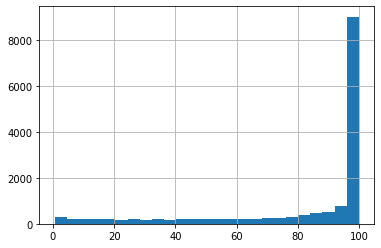

In [25]:
dff['Value'].hist(bins=25)

En este caso el pico está en el 100 pero desde el 0 al 100 hay pocos datos que se reparten uniformemente.

AxesSubplot(0.125,0.125;0.775x0.755)


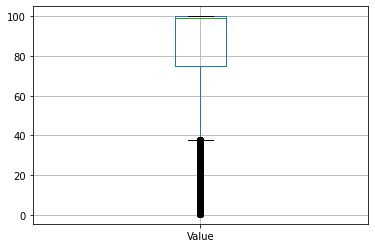

In [26]:
print(dff.boxplot(column='Value'))

<AxesSubplot:xlabel='Value'>

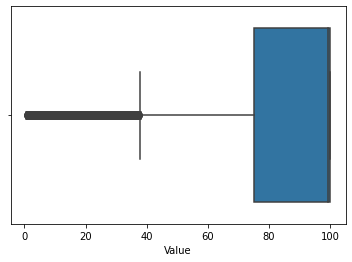

In [27]:
sns.boxplot(x=dff['Value'])

c:\Users\AliPC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value', ylabel='count'>

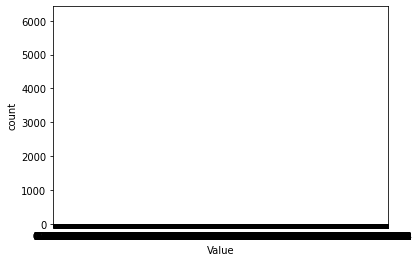

In [28]:
sns.countplot(dff.Value)